In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys; sys.path.insert(0, '/global/homes/e/elliek/kdcount')

from kdcount import KDTree, KDAttr
from kdcount.utils import constant_array

import healpy

import numpy as np
from numpy.testing import assert_equal, run_module_suite
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
rcParams["image.interpolation"] = "nearest"
rcParams["image.aspect"] = "equal"

In [3]:
catdir = '/global/homes/e/elliek/imaginglss/imaginglss/nersc/QSO/'
ra_gal, dec_gal = np.loadtxt(catdir+'QSO.txt.FLUXES', usecols=(0,1), unpack=True)
ra_ran, dec_ran = np.loadtxt(catdir+'QSO_rand.txt.NOISES', usecols=(0,1), unpack=True)
fc_ran = np.loadtxt(catdir+'QSO_rand.txt.FC', unpack=True)

In [4]:
conf_g, conf_r, conf_z = np.loadtxt(catdir+'QSO.txt.CONFIDENCE', usecols=(1,2,4), unpack=True)

In [ ]:
mask = (conf_g > 5) & (conf_r > 5)
ra_gal_conf = ra_gal[mask]
dec_gal_conf = dec_gal[mask]
print 'fraction kept: ',len(ra_gal_conf)*1.0/len(ra_gal)

In [6]:
nside = 2**8

In [7]:
pid_gal = healpy.ang2pix(nside, pi * (0.5 - dec_gal_conf / 180), ra_gal_conf / 180 * pi)
pid_ran = healpy.ang2pix(nside, pi * (0.5 - dec_ran / 180), ra_ran / 180 * pi)

In [8]:
ngal = bincount(pid_gal, minlength = healpy.nside2npix(nside))
nran = bincount(pid_ran, weights = fc_ran, minlength = healpy.nside2npix(nside))

In [9]:
rescale = fc_ran.sum()*1.0/len(ra_gal_conf)
print rescale
nran = nran/rescale
nran[((ngal==0) & (nran==0))] = 1e-20

6.99133906228


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


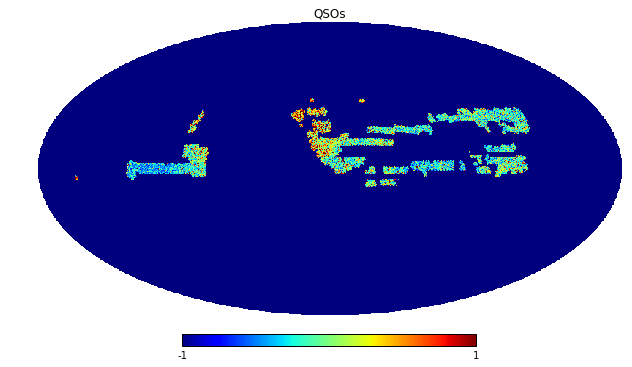

In [10]:
healpy.mollview(ngal/nran-1, min=-1, max=1, rot=(-120,0,0), title='QSOs')